<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [6]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


### VISUALIZATIONS 

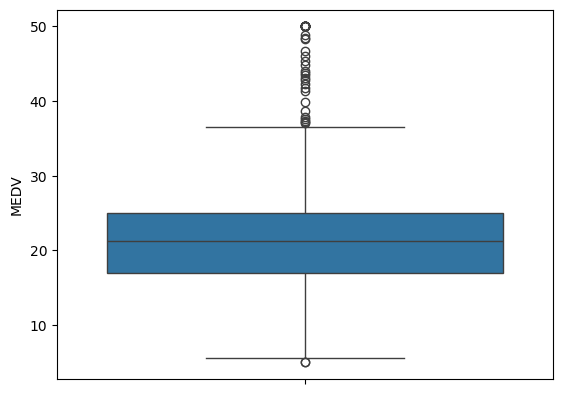

In [10]:
# "Median value of owner-occupied homes" boxplot

ax = sns.boxplot(y='MEDV', data = boston_df)

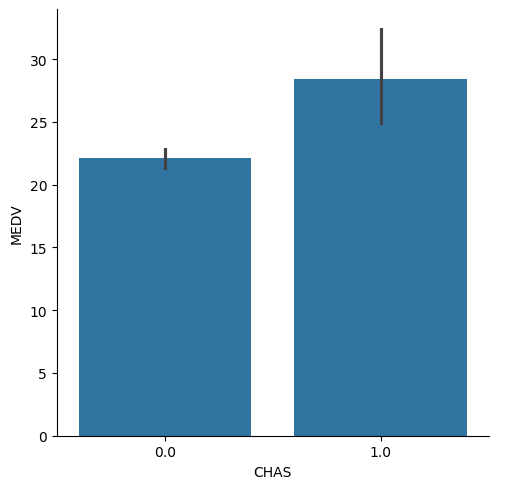

In [20]:
# Bar plot for the Charles river variable

ax = sns.catplot(x='CHAS', y='MEDV', data=boston_df, kind='bar')

In [24]:
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = '35 years and younger'
boston_df.loc[((boston_df['AGE'] > 35) & (boston_df['AGE'] < 70)), 'AGE_GROUP'] = '35 to 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GROUP'] = '70 years and older'

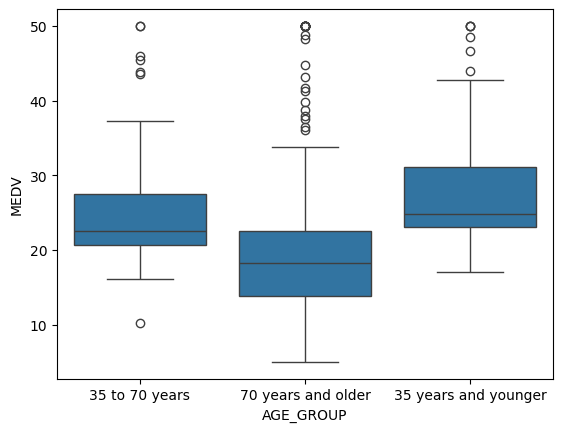

In [27]:
# Boxplot for the MEDV variable vs the AGE variable

ax = sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)

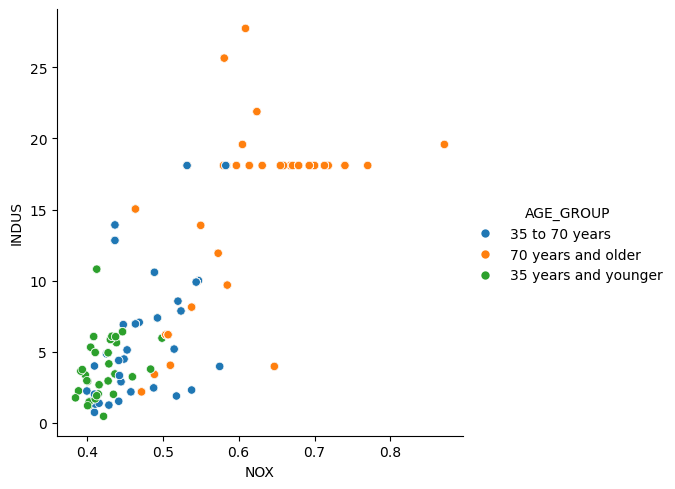

In [33]:
# Scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

ax = sns.relplot(x='NOX', y='INDUS', data=boston_df, hue='AGE_GROUP')

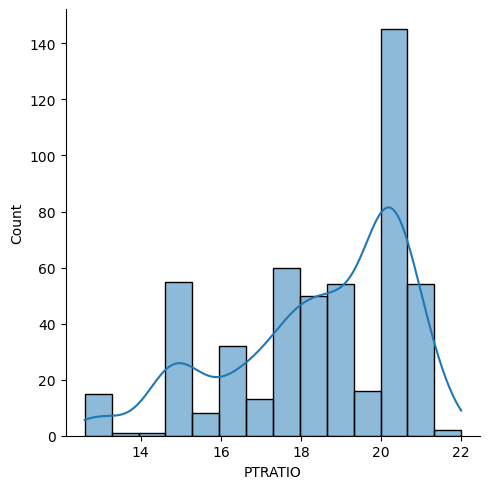

In [38]:
# Histogram for the pupil to teacher ratio variable

ax = sns.displot(data = boston_df, x='PTRATIO', kde=True)

### STATISTICS

In [40]:
# Is there a significant difference in median value of houses bounded by the Charles river or not? 

scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                      boston_df[boston_df['CHAS'] == 1]['MEDV'],
                      equal_var = True)

# H0 rejected, there is a significant difference in means between the median value of houses bounded by the Charles River

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

In [47]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?
younger_35 = boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV']
between_35_70 = boston_df[boston_df['AGE_GROUP'] == '35 to 70 years']['MEDV']
older_70 = boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV']

f_statistics, p_value = scipy.stats.f_oneway(younger_35, between_35_70, older_70)
print(f'F-statistics: {f_statistics}, p-value: {p_value}')

# p-value is less than 0.05 => H0 is rejected, there is a significant difference in the median values for each proportion of owner occupied units built prior to 1940

F-statistics: 36.40764999196599, p-value: 1.7105011022702984e-15


In [51]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? 

res = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(res)

# The p-value is less that 0.05 => there exists a relationship between NOX and INDUS

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)


In [55]:
# What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?

X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X)

lm = sm.OLS(y, X).fit()
predictions = lm.predict(X)

lm.summary()

# p-value is less than 0, which means that DIS significantly affects MEDV

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 30 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        20:51:05   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""